In [13]:
# 2017-06-03 ~ 2021-07-01 의 일론 머스크의 트위터 크롤링
import snscrape.modules.twitter as sntwitter # 트위터 크롤링 도구
import csv # csv파일로 저장

csvFile = open('data/elon_musk_tweet.csv', 'a', newline='', encoding='utf-8')# elon_musk_tweet.csv 파일로 저장

csvWriter = csv.writer(csvFile)
csvWriter.writerow(['date','tweet',])
#until 날짜는 포함안하기 때문에 2021-07-02까지로 설정하여 7월 1일까지의 데이터를 추출
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@elonMusk since:2017-06-03 until:2021-07-02 -filter:links -filter:replies').get_items()):
    csvWriter.writerow([tweet.date, tweet.content]) #date와 tweet내용만을 추출
csvFile.close()

![error](image/wordbreak.PNG)

인코딩을 utf-8 규격으로 하였는데 엑셀에서 csv파일을 열 때 디코딩이 ANSI로 되어있어 글자가 깨지는 현상이 발생함.
메모장을 중계 수단으로 활용하여 ANSI포맷으로 바꾸어주는 작업을 하여 문제를 해결하였다.
![error](image/ansi.PNG)
![error](image/wordfix.PNG)

In [1]:
import pandas as pd
#데이터 원본 불러오기
tweetData = pd.read_csv("./data/elon_musk_tweet.csv",encoding='cp949') #일론 머스크 트윗데이터
dogeData = pd.read_csv("./data/Dogecoin Historical Data.csv") # 도지코인 데이터

In [2]:
tweetData

,date,tweet
0,2021-07-01 09:24:21+00:00,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge..."
1,2021-07-01 08:42:11+00:00,Stop gendering memes … I mean mimes
2,2021-06-30 20:11:10+00:00,"Rapidly Reusable Rockets, R R R ?????"
3,2021-06-28 20:25:03+00:00,Thanks for all the happy birthday wishes!
4,2021-06-25 22:51:28+00:00,Starlink simultaneously active users just exce...
...,...,...
660,2017-06-08 19:59:20+00:00,Just tap the voice button on the steering whee...
661,2017-06-08 19:10:27+00:00,"In the US, you can ask your Tesla to play any ..."
662,2017-06-08 19:05:56+00:00,Try the new Tesla DJ station on streaming radio
663,2017-06-07 01:12:44+00:00,"A little red wine, vintage record, some Ambien..."


In [3]:
dogeData 

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 01, 2021",0.245110,0.253113,0.253113,0.241754,2.30B,-3.18%
1,"Jun 30, 2021",0.253155,0.261972,0.262796,0.237309,2.62B,-3.36%
2,"Jun 29, 2021",0.261960,0.255102,0.273184,0.250805,3.01B,2.69%
3,"Jun 28, 2021",0.255086,0.264244,0.266409,0.249685,2.76B,-3.32%
4,"Jun 27, 2021",0.263852,0.245715,0.266204,0.240106,3.12B,7.84%
...,...,...,...,...,...,...,...
1485,"Jun 07, 2017",0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
1486,"Jun 06, 2017",0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
1487,"Jun 05, 2017",0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
1488,"Jun 04, 2017",0.003770,0.003213,0.003770,0.002544,5.96M,17.34%


# 도지코인 상위 등락률과 일론머스크 트윗과의 관계

In [9]:
# 도지코인 등락률 절댓값 상위 10개의 날짜 추출
import re # str를 사용하기 위해 import
import datetime # strftime 사용
dogeData["Change %"] = dogeData["Change %"].astype(str).str.replace('%','') # %기호 삭제
dogeData["Change %"] = dogeData["Change %"].astype(str).str.replace(',','') # 천단위 구분기호 , 삭제
dogeData["Change %"] = dogeData["Change %"].astype(str).str.replace('-','') # 상승이든 하락이든 변동성자체를 보기 위한 분석이므로 절대값처리
dogeData["Change %"] = pd.to_numeric(dogeData["Change %"]) # 내림차순을 하기위해서 str형에서 숫자형으로 변환
topTenDogeChange = dogeData.sort_values(by="Change %", ascending=False).head(10) # change를 기준으로 내림차순 정렬하여 상위 10개를 뽑음
topTenDateList = topTenDogeChange["Date"].values.tolist() # 순서대로 날짜 리스트 추출
topTenDateList = pd.to_datetime(topTenDateList) # 리스트를 날짜 형식으로 변환

# 01-Jul-21과 같은 날짜형식을 일론 머스크 트윗 데이터 형식에 맞게 2021-01-01 과 같은 형식으로 변환
for i in range(len(topTenDateList)):
    topTenDateList[i].strftime("%Y-%m-%d") # 2021-01-01 00:00:00 과 같은 형식으로 변환. 이후 date()를 사용하여 날짜만 추출하여 사용
topTenDateList

DatetimeIndex(['2020-01-15', '2021-01-28', '2021-04-16', '2020-01-16',
               '2021-01-02', '2017-12-16', '2020-07-08', '2021-04-15',
               '2018-08-31', '2021-02-04'],
              dtype='datetime64[ns]', freq=None)

In [10]:
#tweetData 형식 수정
tweetData['date'] = pd.to_datetime(tweetData['date'],errors='coerce') # tweetData의 date열의 값들을 날짜형식으로 변환
tweetData['date'] = tweetData['date'].dt.strftime("%Y-%m-%d") # date열의 값들에서 시간을 제외하고 날짜 데이터만 남김
tweetData

,date,tweet
0,2021-07-01,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge..."
1,2021-07-01,Stop gendering memes … I mean mimes
2,2021-06-30,"Rapidly Reusable Rockets, R R R ?????"
3,2021-06-28,Thanks for all the happy birthday wishes!
4,2021-06-25,Starlink simultaneously active users just exce...
...,...,...
660,2017-06-08,Just tap the voice button on the steering whee...
661,2017-06-08,"In the US, you can ask your Tesla to play any ..."
662,2017-06-08,Try the new Tesla DJ station on streaming radio
663,2017-06-07,"A little red wine, vintage record, some Ambien..."


In [11]:
# topTenDateList에 해당하는 날짜에 트윗이 있다면 해당 트윗을 리스트 형식으로 저장
tweetBox = [] # topTenDateList의 날짜에 해당하는 index를 저장할 list
for i in range(len(topTenDateList)):
    temBox = [] # topTenDateList의 각 값마다 저장하기 위해서 이중 리스트 구조로 저장. 
    for j in range(tweetData.shape[0]):
        if tweetData.iloc[j]['date'] == str(topTenDateList[i].date()): # 두 데이터의 날짜가 같은 경우 tweetData에 해당하는 트윗을 리스트에 저장
            temBox.append(tweetData.iloc[j]['tweet'])
    tweetBox.append(temBox)
tweetBox # \n은 줄바꿈 이스케이프 시퀀스이다.

[[],
 ['With Cyberpunk, even the hotfixes literally have hotfixes, but … great game',
  'Here come the shorty apologists\nGive them no respect\nGet Shorty',
  'u can’t sell houses u don’t own\nu can’t sell cars u don’t own\nbut \nu *can* sell stock u don’t own!?\nthis is bs ? shorting is a scam\nlegal only for vestigial reasons',
  'Even Discord has gone corpo …'],
 ['???? Austin Rocks!! ?? ??', 'Make life multiplanetary! #Mars'],
 [],
 [],
 ['42k'],
 [],
 ['?\n\n           ????♡'],
 [],
 ['I am become meme,\nDestroyer of shorts',
  'Sandstorm is a masterpiece',
  'Low-key Loki',
  'No highs, no lows, only Doge',
  'Dogecoin is the people’s crypto']]

# 도지코인의 가격과 일론머스크의 트윗 언급(Doge, coin) 과의 관계

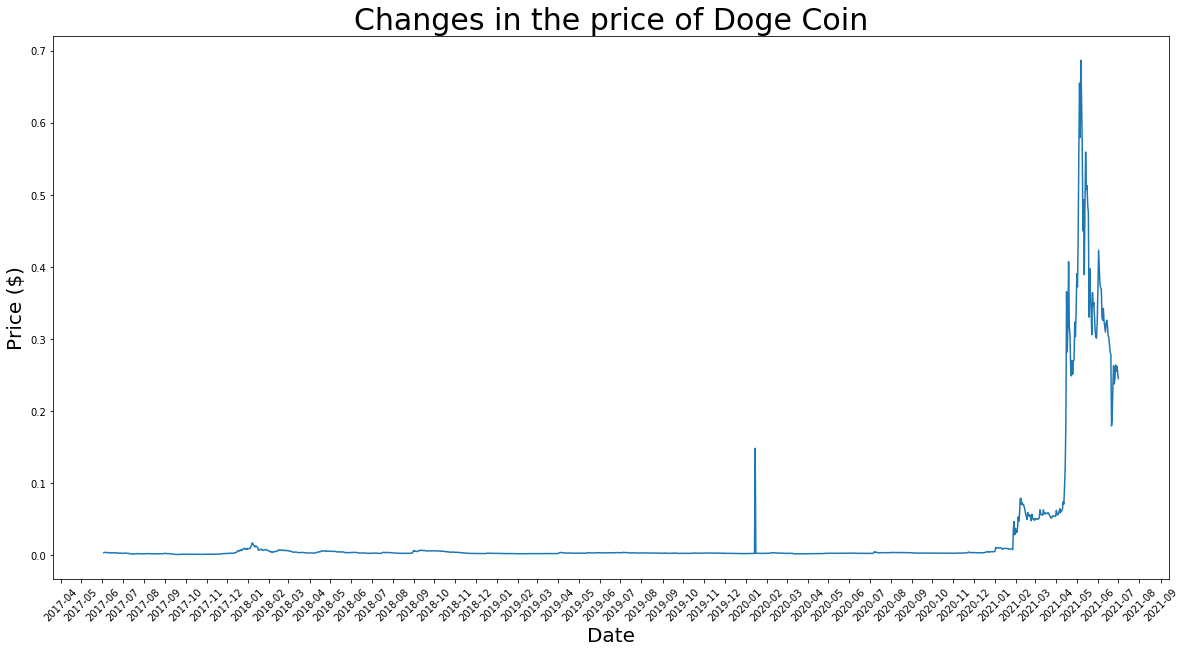

In [49]:
#도지코인의 price 그래프 생성
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dogeGraph = plt.figure(figsize=(20,10)) # 그래프 사이즈 설정
dogeGraph.set_facecolor('white') # 배경색 흰색으로 설정
dogeFrame = dogeGraph.add_subplot() # 프레임 생성
dogeFrame.plot(dogeData['Date'],dogeData['Price']) # 선그래프 생성 x축은 Date, y축은 Price
dogeFrame.xaxis.set_major_locator(mdates.MonthLocator()) # x축의 Date를 월별 단위로 설정

plt.xticks(rotation=45) # x축 단위 글자 안겹치게 45도 기울도록 설정
plt.title('Changes in the price of Doge Coin', fontsize=30) # 차트 제목
plt.xlabel('Date',fontsize=20) # x축제목
plt.ylabel('Price ($)',fontsize=20) # y축제목
plt.show()

In [38]:
#일론머스크 트윗에 특정 키워드의 언급수 구하기
# 키워드는 Doge, doge, coin , Coin으로 설정함 (bitcoin에은coin이라는 키워드가 포함되어있어 중복되어 개수가 세질 수 있기 때문에 제외함.)
tweetData['keyword_count'] = tweetData.tweet.str.count('Doge') + tweetData.tweet.str.count('doge') + tweetData.tweet.str.count('Coin') + tweetData.tweet.str.count('coin')
tweetData = tweetData.sort_values(by=['date']) # 도지코인 데이터와 같이 최근 날짜가 아래로 오도록 정렬
tweetData

,date,tweet,keyword_count
664,2017-06-04,It's starting to feel kinda normal to reuse ro...,0
663,2017-06-07,"A little red wine, vintage record, some Ambien...",0
661,2017-06-08,"In the US, you can ask your Tesla to play any ...",0
662,2017-06-08,Try the new Tesla DJ station on streaming radio,0
660,2017-06-08,Just tap the voice button on the steering whee...,0
...,...,...,...
4,2021-06-25,Starlink simultaneously active users just exce...,0
3,2021-06-28,Thanks for all the happy birthday wishes!,0
2,2021-06-30,"Rapidly Reusable Rockets, R R R ?????",0
1,2021-07-01,Stop gendering memes … I mean mimes,0


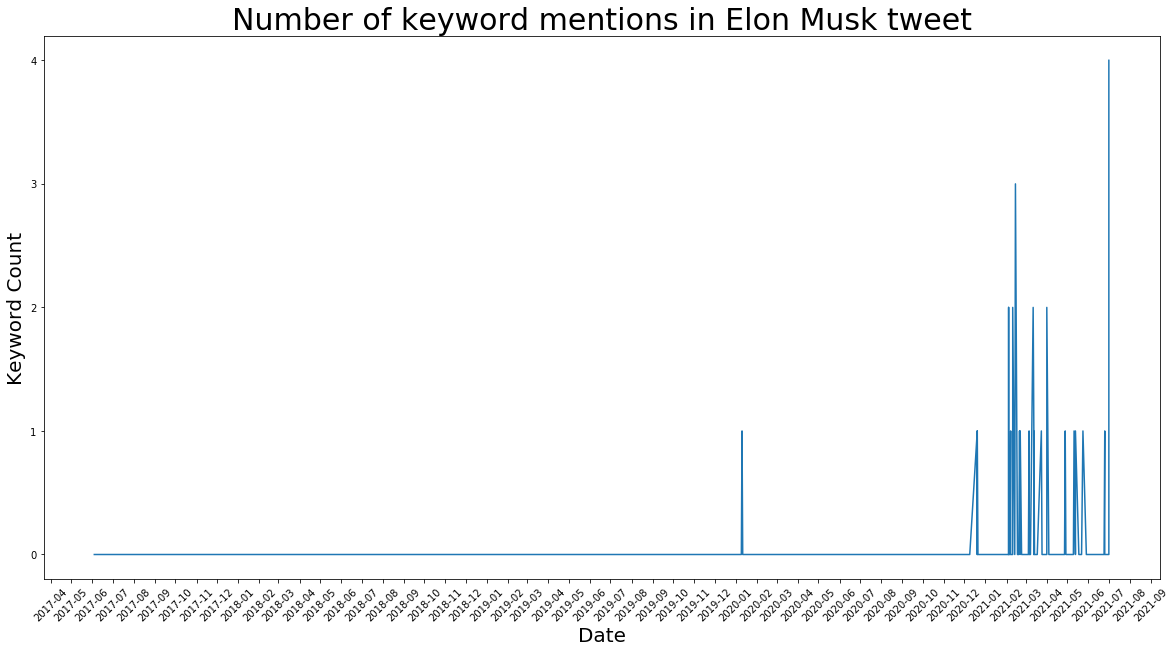

In [53]:
#일론머스크 트윗 키워드 언급수 그래프 생성

tweetGraph = plt.figure(figsize=(20,10)) # 그래프 사이즈 설정
tweetGraph.set_facecolor('white') # 배경색 흰색으로 설정
tweetFrame = tweetGraph.add_subplot() # 프레임 생성
tweetFrame.plot(tweetData['date'],tweetData['keyword_count']) # 선그래프 생성 x축은 Date, y축은 Price

tweetFrame.xaxis.set_major_locator(mdates.MonthLocator()) # x축의 Date를 월별 단위로 설정
tweetFrame.yaxis.set_major_locator(ticker.MultipleLocator(1)) # y축 데이터는 개수이니까 기본적으로 나오는 0.5가 아니라 1단위로 생성
plt.xticks(rotation=45) # x축 단위 글자 안겹치게 45도 기울도록 설정
plt.title('Number of keyword mentions in Elon Musk tweet', fontsize=30) # 차트 제목
plt.xlabel('Date',fontsize=20) # x축제목
plt.ylabel('Keyword Count',fontsize=20) # y축제목
plt.show()